<a href="https://colab.research.google.com/github/sanaullahgithub/Final_Project_kidney_disease_Classification/blob/main/Kidney_disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Importing Libraries to work

In [60]:
import math
import itertools
import numpy as np                         # Data Manipulation
import pandas as pd                        # Data Manipulation
import seaborn as sns                      # For Plotting
import matplotlib.pyplot as plt            # For Plotting
from sklearn.impute import SimpleImputer   # Predict Missing Values to Fill Nulls in the Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.exceptions import FitFailedWarning
import warnings
# Suppress warnings from RandomizedSearchCV
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Data Preprocessing

**Combining Features and Target Variable**

In [4]:
# Combine features and target
data_combined = pd.concat([X, y], axis=1)

# Display the combined DataFrame
print(data_combined.head())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]


# Data Information

In [5]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**Data Statistics**

In [6]:
data_combined.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Checking Null Values

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


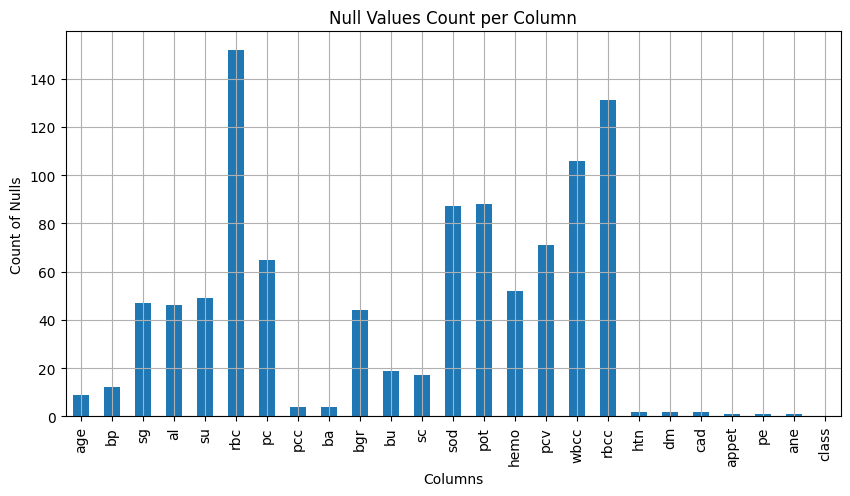

In [7]:
# Check for null values in the dataset
null_counts = data_combined.isnull().sum()

# Display columns with null values and their counts
print(null_counts[null_counts > 0])
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar')
plt.title("Null Values Count per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Nulls")
plt.grid()

# Deal with the NUll Values

In [8]:
# Separate features into numerical and categorical
numerical_cols = data_combined.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_combined.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
data_combined[numerical_cols] = num_imputer.fit_transform(data_combined[numerical_cols])

# Impute categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_combined[categorical_cols] = cat_imputer.fit_transform(data_combined[categorical_cols])

# Verify null values have been handled
print("Null values remaining:")
print(data_combined.isnull().sum().sum())  # Should print 0 if all nulls are handled

Null values remaining:
0


# Unique Values in Each Column

In [9]:
# Identify categorical columns
categorical_columns = data_combined.select_dtypes(include=['object', 'category']).columns

# Check unique values in each categorical column
for col in categorical_columns:
    unique_values = data_combined[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: rbc
Unique Values (2): ['normal' 'abnormal']

Column: pc
Unique Values (2): ['normal' 'abnormal']

Column: pcc
Unique Values (2): ['notpresent' 'present']

Column: ba
Unique Values (2): ['notpresent' 'present']

Column: htn
Unique Values (2): ['yes' 'no']

Column: dm
Unique Values (3): ['yes' 'no' '\tno']

Column: cad
Unique Values (2): ['no' 'yes']

Column: appet
Unique Values (2): ['good' 'poor']

Column: pe
Unique Values (2): ['no' 'yes']

Column: ane
Unique Values (2): ['no' 'yes']

Column: class
Unique Values (3): ['ckd' 'ckd\t' 'notckd']



# Data Cleaning

In [10]:
# Clean the 'dm' column
data_combined['dm'] = data_combined['dm'].str.strip()  # Remove leading/trailing whitespaces
data_combined['dm'] = data_combined['dm'].replace({'\tno': 'no'})  # Replace '\tno' with 'no'

# Clean the class column
data_combined['class'] = data_combined['class'].str.strip()  # Remove leading/trailing whitespaces
data_combined['class'] = data_combined['class'].replace({'ckd\t': 'ckd'})  # Replace 'ckd\t' with 'ckd'

# Verify the fixes
print("Unique values in 'dm':", data_combined['dm'].unique())
print("Unique values in 'class':", data_combined['class'].unique())

Unique values in 'dm': ['yes' 'no']
Unique values in 'class': ['ckd' 'notckd']


In [11]:
# Rename the columns with more descriptive names
column_mapping = {
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red_Blood_Cells',
    'pc': 'Pus_Cells',
    'pcc': 'Pus_Cell_Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wbcc': 'White_Blood_Cell_Count',
    'rbcc': 'Red_Blood_Cell_Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes_Mellitus',
    'cad': 'Coronary_Artery_Disease',
    'appet': 'Appetite',
    'pe': 'Pedal_Edema',
    'ane': 'Anemia',
    'class': 'Class'
}
data_combined.rename(columns=column_mapping, inplace=True)

# Display the renamed DataFrame
data_combined.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


# EDA

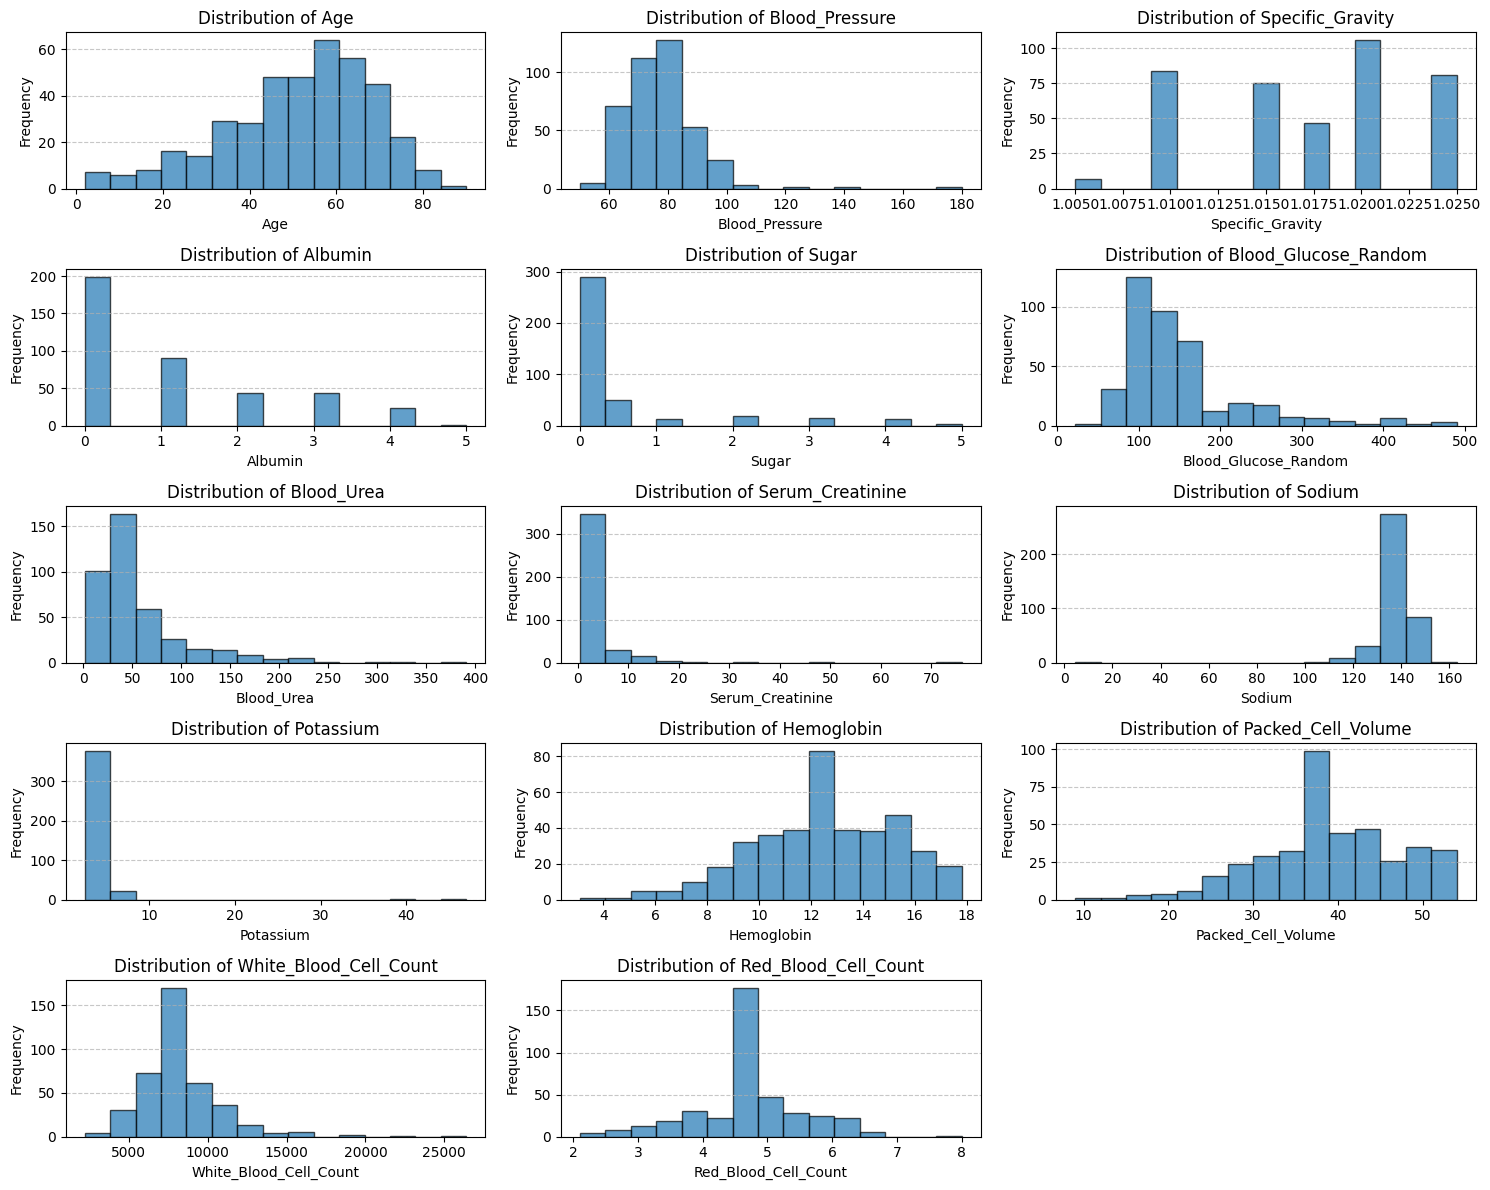

In [15]:
# Automatically identify numerical columns using DataFrame's `select_dtypes` method
numerical_features = data_combined.select_dtypes(include=["number"]).columns

# Calculate the number of rows and columns dynamically
n_features = len(numerical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Calculate the required number of rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    ax.hist(data_combined[feature].dropna(), bins=15, alpha=0.7, edgecolor="black")
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

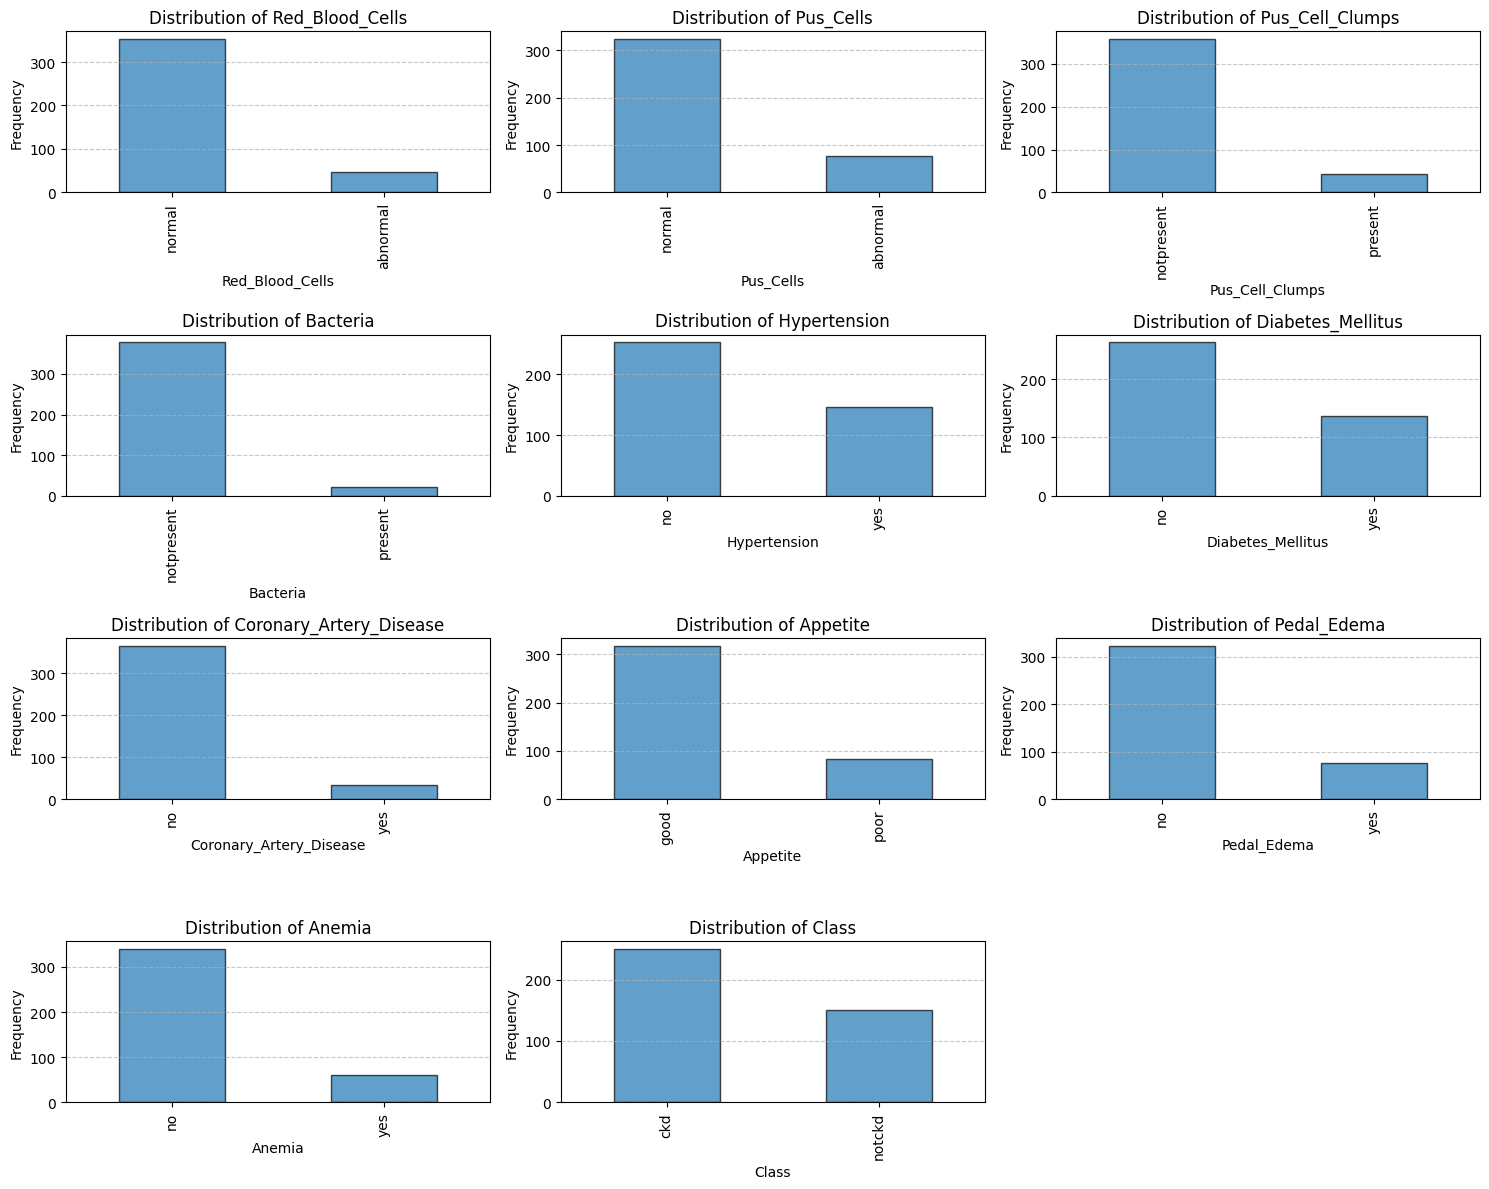

In [17]:
# Automatically identify categorical columns using DataFrame's `select_dtypes` method
categorical_features = data_combined.select_dtypes(include=["object", "category"]).columns

# Calculate the number of rows and columns dynamically
n_features = len(categorical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Calculate the required number of rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    data_combined[feature].value_counts().plot(
        kind="bar", ax=ax, alpha=0.7, edgecolor="black"
    )
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [19]:
# Convert the 'Class' column to binary values (0 and 1) directly
data_combined['Class'] = data_combined['Class'].apply(lambda x: 1 if x == 'ckd' else 0)

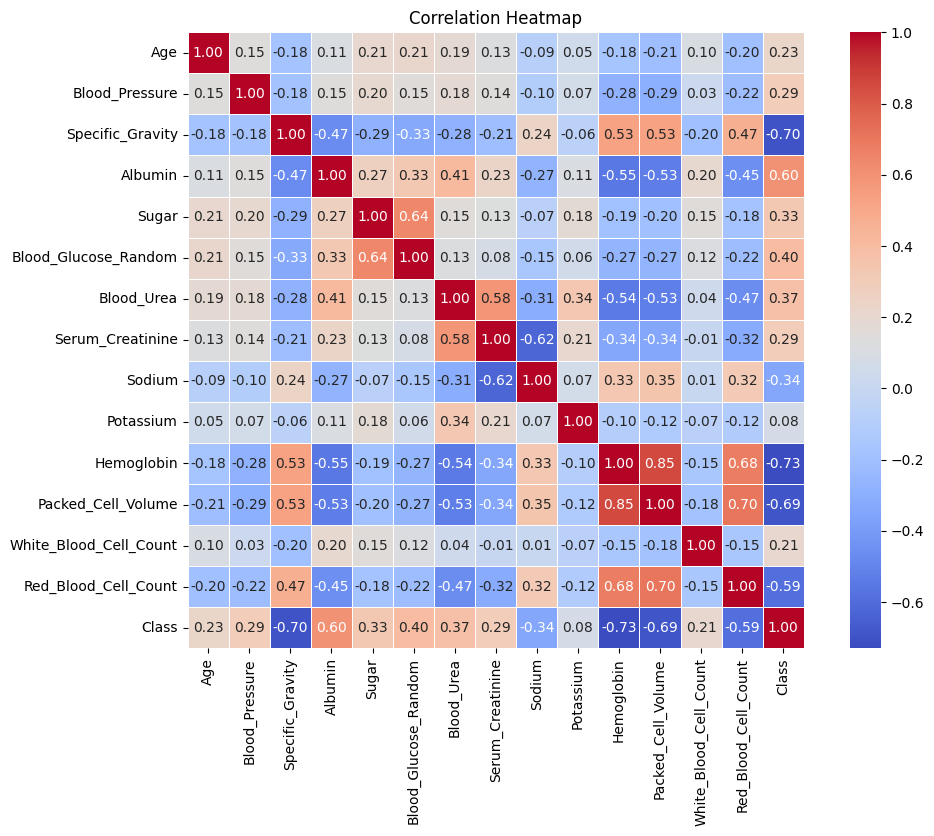

In [20]:
# Compute correlation matrix for numerical features
correlation_matrix = data_combined.select_dtypes(include=["number"]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar=True,
)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-23-b7dc91476187>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


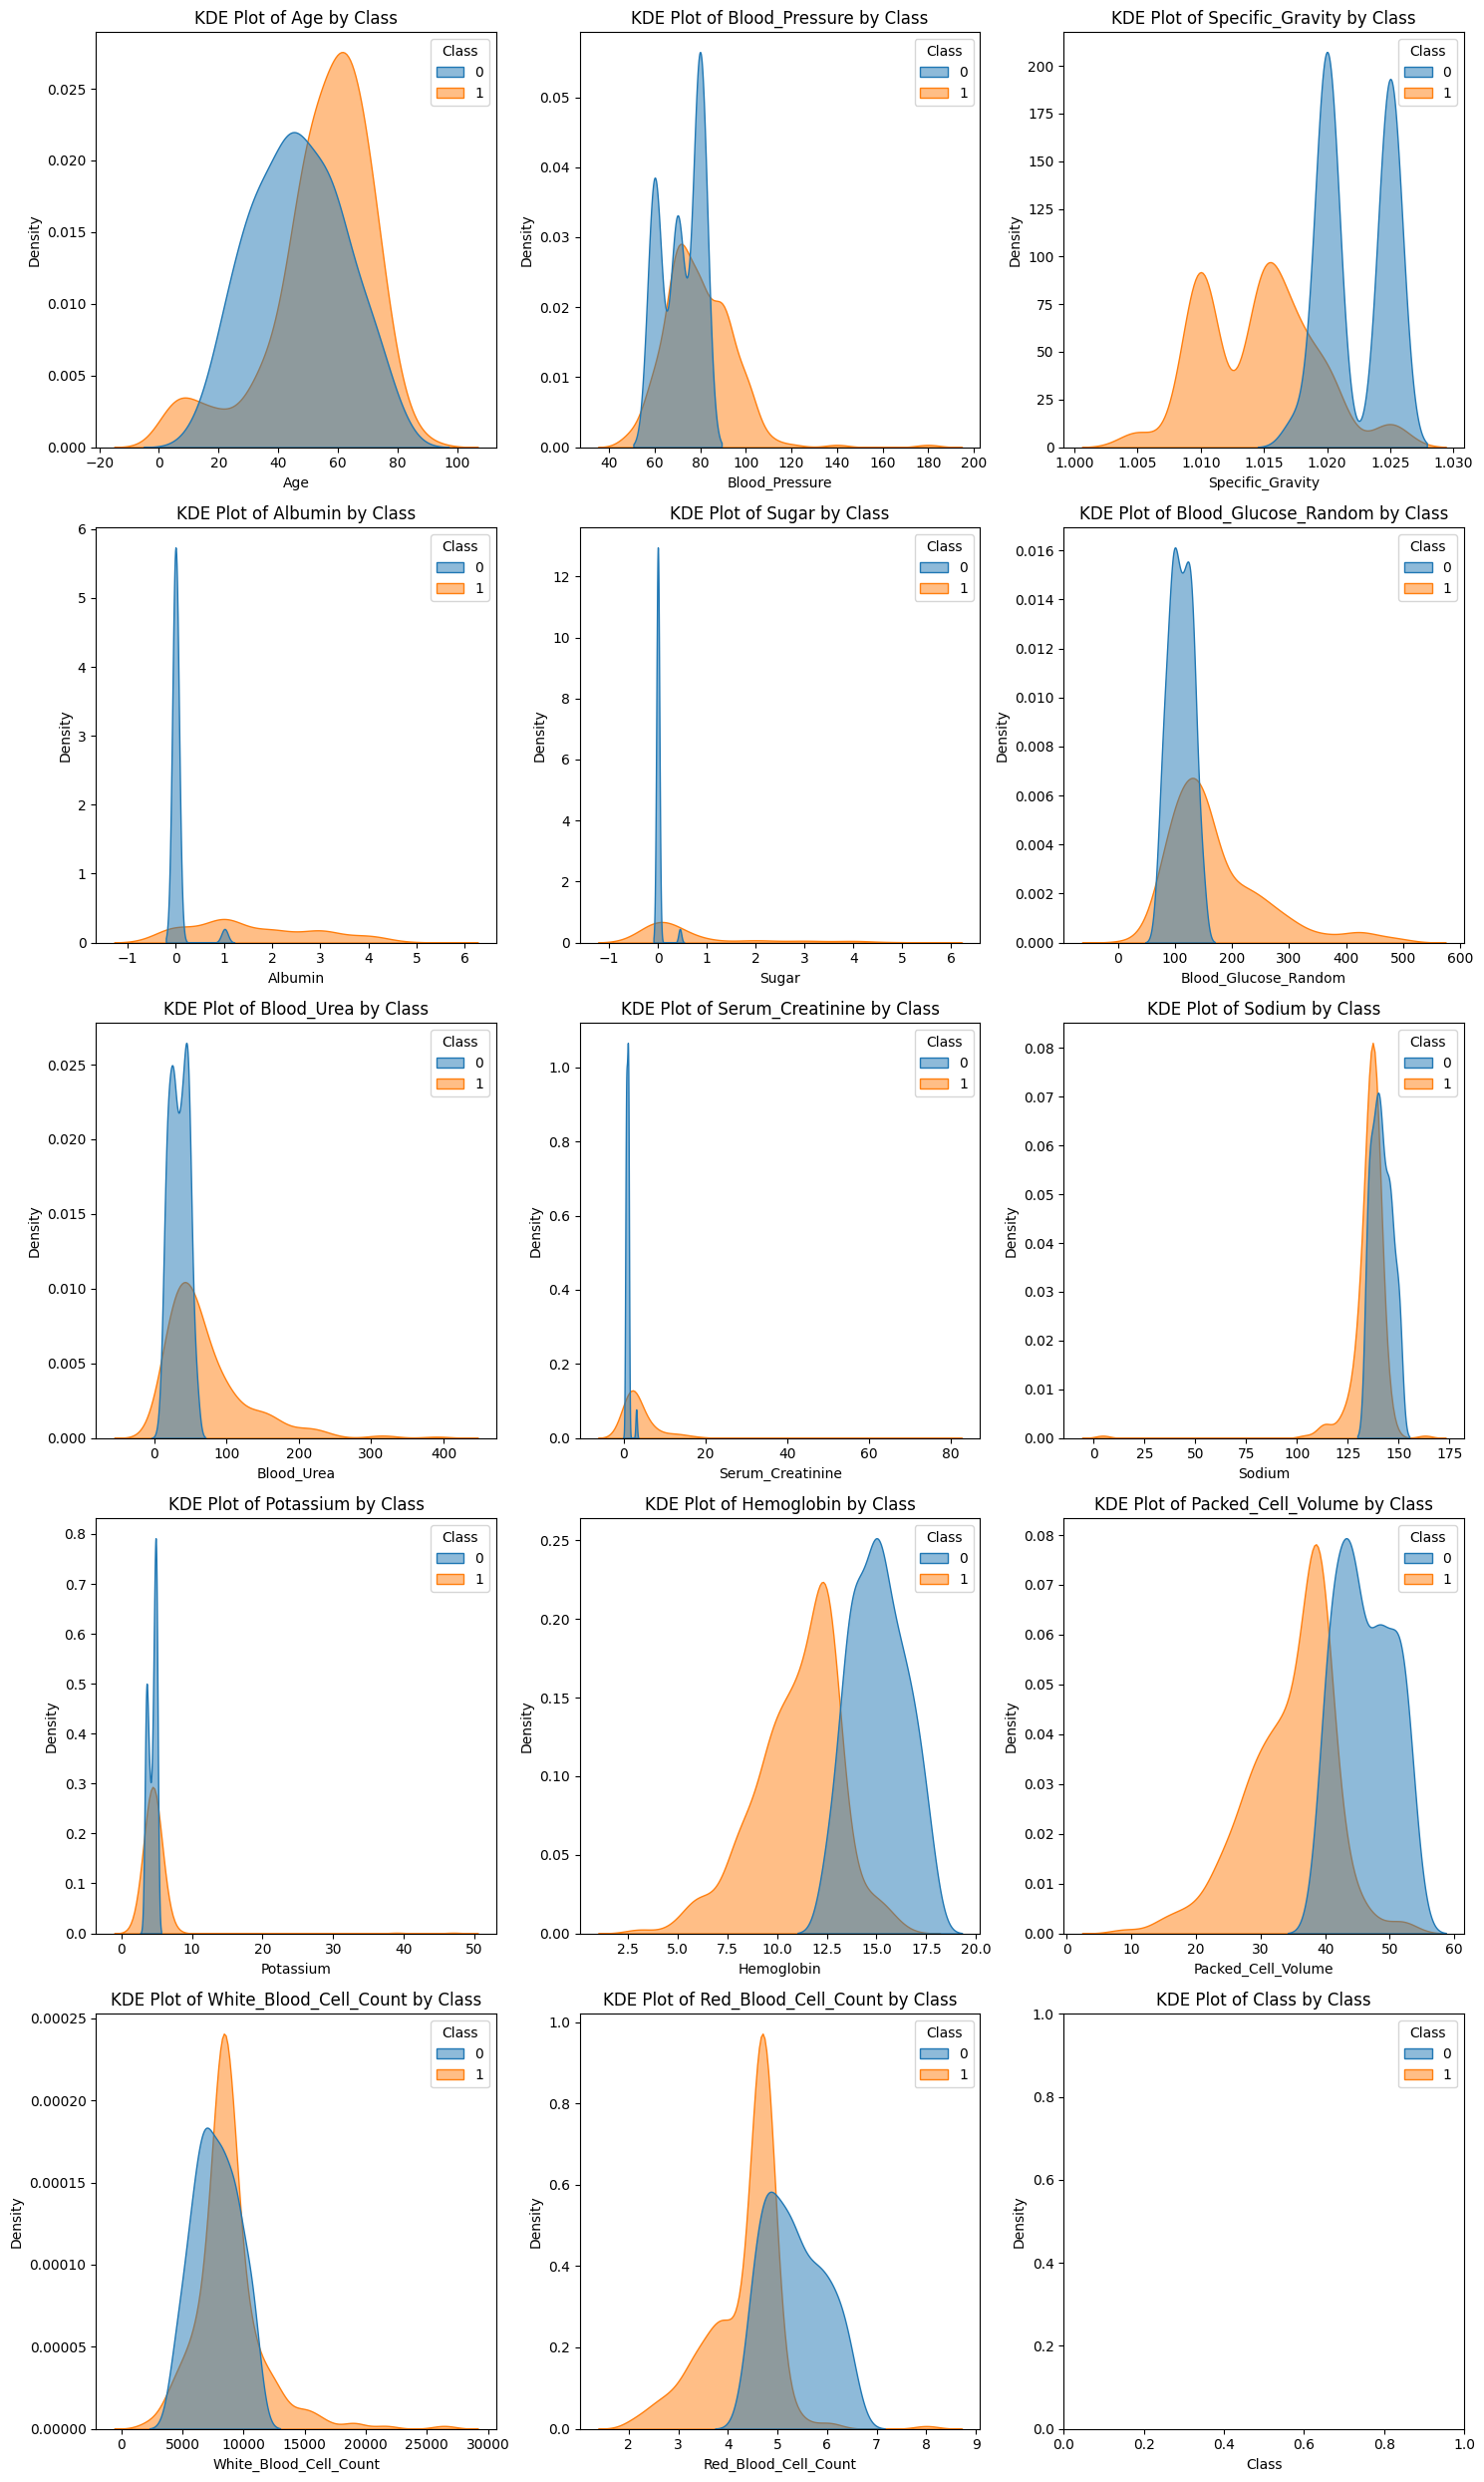

In [23]:
# Filter numerical features
numerical_features = data_combined.select_dtypes(include=["number"]).columns

# Calculate the number of rows and columns dynamically
n_features = len(numerical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Calculate the required number of rows

# Plot KDE plots for numerical features with respect to the 'Class' column
plt.figure(figsize=(15, n_rows * 5))  # Adjust height dynamically
for idx, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.kdeplot(
        data=data_combined,
        x=feature,
        hue="Class",
        fill=True,
        alpha=0.5,
        common_norm=False,
    )
    plt.title(f"KDE Plot of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
# 1 mean CKD and 0 mean Not-CKD

# Feature Selection

In [28]:
# Prepare data for feature selection
X = data_combined.drop(columns=["Class"])  # Features
y = data_combined["Class"]  # Target

# Encode categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize numerical features to [0,1] range for chi2 compatibility
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Select best features using ANOVA F-test and Chi-squared test
anova_selector = SelectKBest(score_func=f_classif, k="all")  # ANOVA F-test
chi2_selector = SelectKBest(score_func=chi2, k="all")  # Chi-squared test

anova_scores = anova_selector.fit(X_normalized, y).scores_
chi2_scores = chi2_selector.fit(X_normalized, y).scores_

# Combine scores into a DataFrame for comparison
feature_scores = pd.DataFrame({
    "Feature": X_encoded.columns,
    "ANOVA_F_Score": anova_scores,
    "Chi2_Score": chi2_scores
}).sort_values(by="ANOVA_F_Score", ascending=False)

# Display the resulting DataFrame
print(feature_scores)

                        Feature  ANOVA_F_Score  Chi2_Score
10                   Hemoglobin     453.077892   11.309043
2              Specific_Gravity     380.166757   22.646074
11           Packed_Cell_Volume     361.807452    9.386827
3                       Albumin     222.988622   45.613559
13         Red_Blood_Cell_Count     213.534957    6.394972
18             Hypertension_yes     213.007282   88.200000
19        Diabetes_Mellitus_yes     180.949115   82.200000
5          Blood_Glucose_Random      76.431197    6.094381
21                Appetite_poor      72.848214   49.200000
22              Pedal_Edema_yes      65.189655   45.600000
15             Pus_Cells_normal      65.189655   10.696296
6                    Blood_Urea      63.935817    6.158310
8                        Sodium      52.818300    0.187828
4                         Sugar      47.918793   20.190389
23                   Anemia_yes      47.131579   36.000000
7              Serum_Creatinine      37.678634    5.3895

In [29]:
# Select the top 6 features based on ANOVA F-test scores
top_features = feature_scores.nlargest(6, 'ANOVA_F_Score')['Feature']

# Filter the dataset to include only the top features
X_selected = X_encoded[top_features]

# Display the selected features
print("Top 6 Features Selected for Training:")
print(top_features.tolist())

Top 6 Features Selected for Training:
['Hemoglobin', 'Specific_Gravity', 'Packed_Cell_Volume', 'Albumin', 'Red_Blood_Cell_Count', 'Hypertension_yes']


# Model Traning

In [30]:
# Separate target variable and features for training
X = X_selected  # Features (top 6 selected)
y = data_combined["Class"]  # Target variable

# Display shapes of features and target for verification
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Shape of Features (X): (400, 6)
Shape of Target (y): (400,)


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Classification With Random Forest

In [33]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}


In [34]:
# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to try
    scoring="accuracy",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [38]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("Best Parameters for Random Forest Classifier:")
print(best_params)

# Evaluate the model on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Random Forest Classifier:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



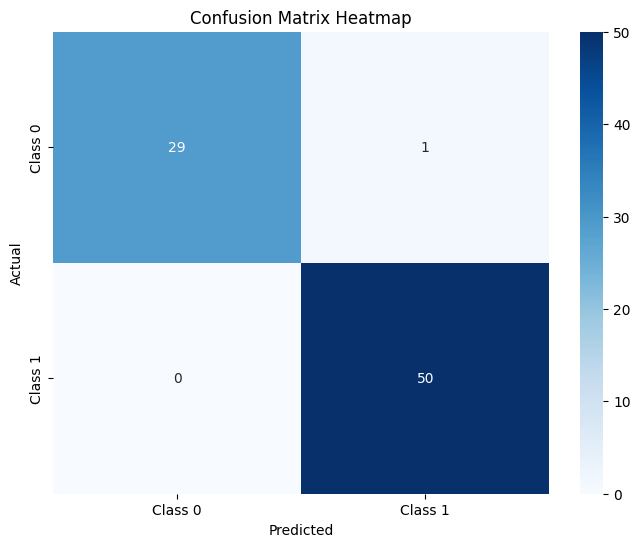

In [41]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"]
)
plt.title("Confusion Matrix Heatmap for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification with Decision Tree Classifier

In [44]:
# Define parameter grid for DecisionTreeClassifier
param_dist_dt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"],
}

In [45]:
# Create the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=50,  # Number of parameter settings to try
    scoring="accuracy",
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

In [46]:
# Fit RandomizedSearchCV
random_search_dt.fit(X_train, y_train)

# Display the best parameters
best_params_dt = random_search_dt.best_params_
print("Best Parameters for Decision Tree Classifier:")
print(best_params_dt)

# Evaluate the model on the test set
best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Best Parameters for Decision Tree Classifier:
{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



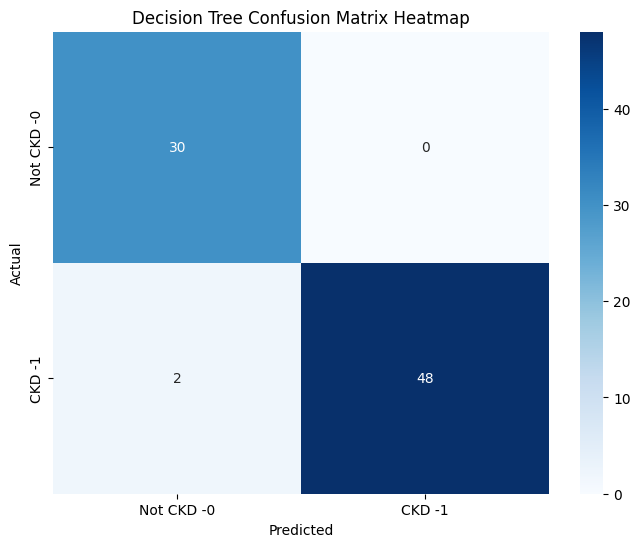

In [48]:
# Compute the confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not CKD -0", "CKD -1"],
    yticklabels=["Not CKD -0", "CKD -1"]
)
plt.title("Decision Tree Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification With Deep Learning ANN Model

In [65]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [66]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [67]:

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),  # Stop if no improvement for 5 epochs
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)  # Reduce learning rate on plateau
]
# Train the model
# Train the model with callbacks
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4827 - loss: 1.8150 - val_accuracy: 0.6406 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4880 - loss: 1.1984 - val_accuracy: 0.7031 - val_loss: 0.6683 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5047 - loss: 0.9200 - val_accuracy: 0.6406 - val_loss: 0.6569 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5827 - loss: 0.7890 - val_accuracy: 0.6406 - val_loss: 0.6551 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6167 - loss: 0.7185 - val_accuracy: 0.6406 - val_loss: 0.6572 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4397 - loss: 0.8415 - val_accuracy: 0.6406 - val_loss: 0.6582 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5252 - loss: 0.7318 - val_accuracy:

In [68]:
# Evaluate the model on the test set
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step



Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.90      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



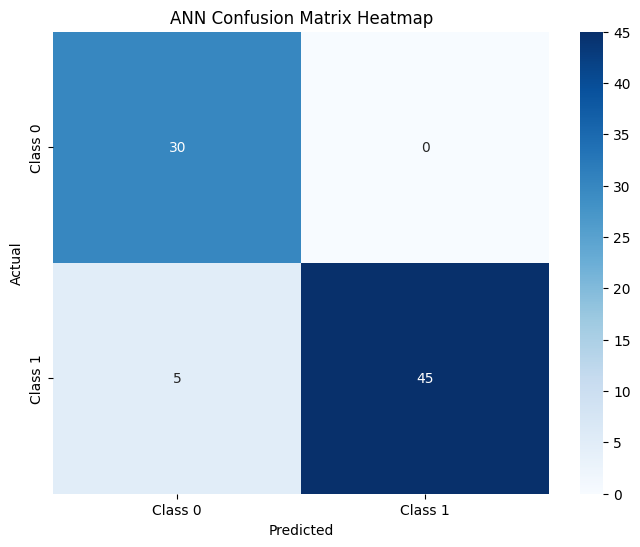

In [69]:
# Classification report
print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann))

# Compute confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_ann,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"]
)
plt.title("ANN Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
